In [32]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import *
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import *
from catboost import CatBoostClassifier

In [33]:
df = pd.read_csv('dataset.csv', header=None)

In [34]:
df.shape

(115000, 64)

In [35]:
X = df.iloc[:,:63]
Y = df.iloc[:, 63]

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.25, shuffle=True)

In [40]:
# model = LogisticRegression(max_iter=400, n_jobs=-1)
model = LogisticRegressionCV(max_iter=400, n_jobs=-1, cv=10, verbose=5)

In [27]:
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy', verbose=10, n_jobs=-1)

In [9]:
np.mean(scores), scores


NameError: name 'scores' is not defined

In [41]:
model.fit(X, Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed: 11.1min remaining: 16.6min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 11.1min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 16.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 16.0min finished
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV(cv=10, max_iter=400, n_jobs=-1, verbose=5)

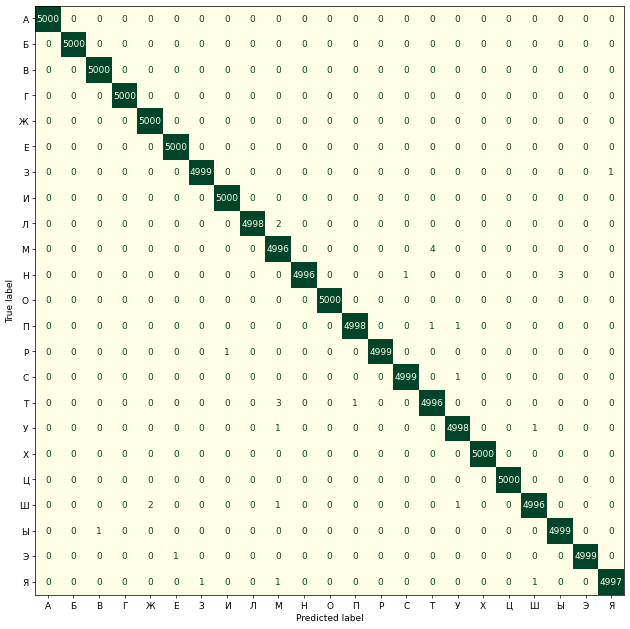

In [44]:
import matplotlib.pyplot as mpl

ax = mpl.figure(figsize=(12, 12), dpi=65, ).gca()

ALPH = ['А', 'Б', 'В', 'Г', 'Ж', 'Е', 'З', 'И', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т','У', 'Х', 'Ц', 'Ш', 'Ы', 'Э', 'Я']
plot_confusion_matrix(model, X, Y, display_labels=ALPH, ax=ax, cmap='YlGn', colorbar=None)

In [45]:
classes = Y.nunique()
filename = f'lr_{classes}.sav'
pickle.dump(model, open(f'../models/{filename}', 'wb'))

In [46]:
# model.fit(x_train, y_train)
pred = model.predict(X)
# accuracy_score(y_test, pred)

In [49]:
error_idx = np.nonzero(Y.to_numpy() - pred)[0]
idx = Y.iloc[error_idx].index.values.astype(int)
mistakes = list(zip(idx, pred[error_idx].astype('int'), Y.to_numpy()[error_idx].astype('int')))

with open('wrong_predict.txt', 'w') as out:
    for line in mistakes:
        print(*line, file=out)

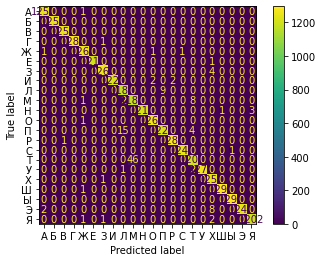

In [22]:
plot_confusion_matrix(model, x_test, y_test, display_labels=ALPH)